# Data Smart Sans Excel

[Table of Contents](Data%20Smart%20Sans%20Excel.ipynb)

If you have not downloaded the Data Smart files then run the first code block of the main notebook and it will download the files from the web. 

## Chapter 6 - Regression

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as skl_linear_model
%matplotlib inline

## Pregnancy Prediction Using Linear Regression

### Data Prep

In [2]:
RetailMart = os.path.join(os.getcwd(), "data_smart_files", "ch06", "RetailMart.xlsx")
training_data = pd.read_excel(RetailMart, 'Training Data', parse_cols = "A:Q")
prego = pd.read_excel(RetailMart, 'Training Data', parse_cols = "S:S")
test_data = pd.read_excel(RetailMart, 'Test Set', parse_cols = "A:S")
prego_test = pd.read_excel(RetailMart, 'Test Set', parse_cols = "U:U")

In [3]:
training_data['Male'] = np.where(training_data['Implied Gender'] == 'M',1,0)
training_data['Female']= np.where(training_data['Implied Gender'] == 'F',1,0)
del training_data['Implied Gender']
training_data['Home'] = np.where(training_data['Home/Apt/ PO Box'] == 'H',1,0)
training_data['Apt']= np.where(training_data['Home/Apt/ PO Box'] == 'A',1,0)
del training_data['Home/Apt/ PO Box']
training_data['Intercept'] = 1

In [26]:
# to ensure we are comparing apples and apples, going to reorder 
books_model = pd.read_excel(RetailMart, 'Linear Model', parse_cols = "A:U",skip_footer=1005,index=0)
training_data = training_data[books_model.columns] # sort in the same order as the book

various_models = books_model.copy()
various_models.rename({'Model Coefficients':'The Books Model'},inplace=True)

In [5]:
training_data.head()

,Male,Female,Home,Apt,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Intercept
0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


### Linear Regression Method 1: Gradient Descent

In [32]:
# Note: some of the below code was generated during Andrew Ng's Machine Learning class. 
# It likely includes some of the starter code he provided. 

def gradientDescent(X, y, theta, alpha, num_iters):   
    theta_history = np.zeros((num_iters, len(theta)))
    J_history = np.zeros((num_iters))
    m = len(y)
    for i in range(num_iters):
        #J = 1/(2*m) * sum((X * theta - y).^2);
        error = np.dot(X, theta) - y 
        cost = (1/2*m) * np.square(error).sum()
        gradient = np.dot(X.T, error) / m 
        theta = theta - (alpha * gradient)
        theta_history[i,:] = theta
        J_history[i] = cost
    return [theta, theta_history, J_history]

In [33]:
X = training_data.values
y = prego.values.flatten()
m = len(y)

num_iters = 500
theta = np.zeros((X.shape[1]))

alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.]
for alpha in alphas:
    theta = np.zeros((X.shape[1]))
    [theta, theta_history, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    model_prediction = np.dot(training_data.values, theta.reshape(-1,1))
    sqrd_err = np.square(prego.values - model_prediction)
    sq_er_sm = sqrd_err.sum()
    print('For an alpha of %f, the SSE is %f and the minimized cost is %f.'
          %(alpha, sq_er_sm, J_history[-1]))

For an alpha of 0.001000, the SSE is 265.209353 and the minimized cost is 132688.424272.
For an alpha of 0.003000, the SSE is 205.797195 and the minimized cost is 102934.814859.
For an alpha of 0.010000, the SSE is 160.708271 and the minimized cost is 80387.928233.
For an alpha of 0.030000, the SSE is 139.685100 and the minimized cost is 69848.708182.
For an alpha of 0.100000, the SSE is 136.267834 and the minimized cost is 68135.409468.
For an alpha of 0.300000, the SSE is 135.540146 and the minimized cost is 67770.162531.
For an alpha of 1.000000, the SSE is 164.171874 and the minimized cost is 82148.368741.


Based on the above, alpha=0.3 seems to be the best.

array([-0.09382867, -0.02244986, -0.02191385, -0.00748118,  0.2174769 ,
       -0.27360099, -0.23744079,  0.34602167,  0.29440556,  0.30265408,
        0.18185022,  0.23019806,  0.14469418,  0.1602986 , -0.15993322,
        0.16512131,  0.18840182, -0.20742274,  0.24068656,  0.47488631])

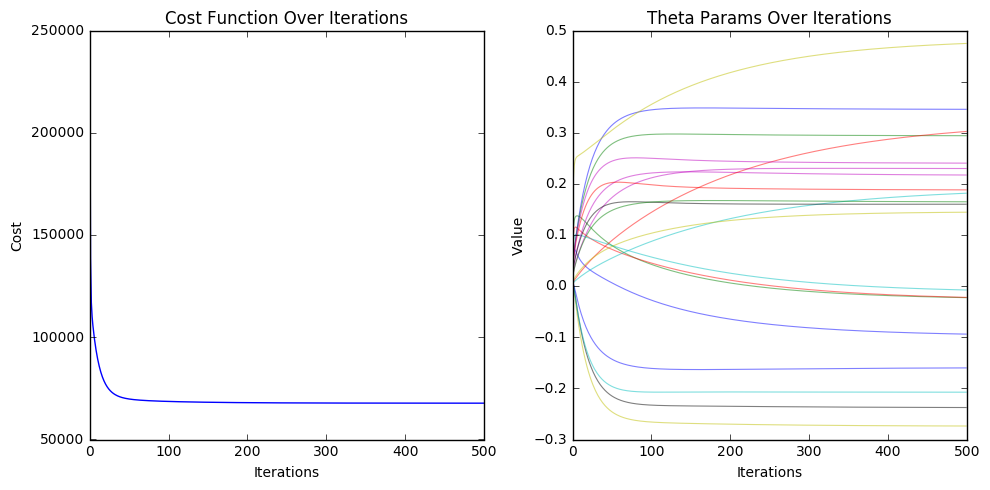

In [34]:
alpha = 0.3
num_iters = 500
theta = np.zeros((X.shape[1]))
[theta, theta_history, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(J_history)
ax1.set_title('Cost Function Over Iterations')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')

ax2.plot(theta_history,linewidth=.8, alpha=0.5)
ax2.set_title('Theta Params Over Iterations')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Value')
f.tight_layout()

model_prediction = np.dot(training_data.values, theta.reshape(-1,1))
sqrd_err = np.square(prego.values - model_prediction)
sq_er_sm = sqrd_err.sum()

theta

In [35]:
various_models.loc['Gradient Descent'] = theta.flatten()

### Linear Regression Method 2: Normal Equation
The following code computes the closed form solution for linear regression using the normal equations.

In [10]:
# pinv is computing the Moore-Penrose pseudo-inverse of a matrix.
theta_pinv = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)), X.T), y)
theta_pinv.flatten()

array([-0.09831062, -0.02682122, -0.02793073, -0.01329783,  0.21639389,
       -0.27408127, -0.23806752,  0.34558503,  0.29412482,  0.32534953,
        0.19362641,  0.2299248 ,  0.14577304,  0.16053328, -0.15907323,
        0.16468839,  0.18778293, -0.20745921,  0.23990856,  0.48422156])

In [29]:
various_models.loc['Normal Eq'] = theta_pinv.flatten()

### Linear Regression Method 3: scikit-learn
The following code uses sklearn's linear_model.LinearRegression function.

In [19]:
regr = skl_linear_model.LinearRegression()
X = training_data.values
y = prego.values
regr.fit(X, y)
theta_skl = regr.coef_.flatten()
theta_skl[-1] = regr.intercept_
theta_skl

array([-0.09831062, -0.02682122, -0.02793073, -0.01329783,  0.21639389,
       -0.27408127, -0.23806752,  0.34558503,  0.29412482,  0.32534953,
        0.19362641,  0.2299248 ,  0.14577304,  0.16053328, -0.15907323,
        0.16468839,  0.18778293, -0.20745921,  0.23990856,  0.48422156])

In [30]:
various_models.loc['sklearn'] = theta_skl

In [36]:
various_models

,Male,Female,Home,Apt,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Intercept
The Books Model,-0.098311,-0.026821,-0.027931,-0.013298,0.216394,-0.274081,-0.238068,0.345585,0.294125,0.325350,0.193626,0.229925,0.145773,0.160533,-0.159073,0.164689,0.187783,-0.207459,0.239909,0.484222
Gradient Descent,-0.093829,-0.022450,-0.021914,-0.007481,0.217477,-0.273601,-0.237441,0.346022,0.294406,0.302654,0.181850,0.230198,0.144694,0.160299,-0.159933,0.165121,0.188402,-0.207423,0.240687,0.474886
Normal Eq,-0.098311,-0.026821,-0.027931,-0.013298,0.216394,-0.274081,-0.238068,0.345585,0.294125,0.325350,0.193626,0.229925,0.145773,0.160533,-0.159073,0.164688,0.187783,-0.207459,0.239909,0.484222
sklearn,-0.098311,-0.026821,-0.027931,-0.013298,0.216394,-0.274081,-0.238068,0.345585,0.294125,0.325350,0.193626,0.229925,0.145773,0.160533,-0.159073,0.164688,0.187783,-0.207459,0.239909,0.484222


All 3 approaches seem to match the book's results pretty closely. Gradient Descent is not exact which makes sense as it would have likely benefited from more iterations. 

In [38]:
sse = []
for row in various_models.iterrows():
    model_prediction = np.dot(training_data.values,
                          row[1].values.reshape(-1,1))
    sqrd_err = np.square(prego.values - model_prediction)
    sse.append(sqrd_err.sum())
    print('The sum of the squared errors for %s: %f'%(row[0], sqrd_err.sum()))

The sum of the squared errors for The Books Model: 135.524328
The sum of the squared errors for Gradient Descent: 135.540146
The sum of the squared errors for Normal Eq: 135.524328
The sum of the squared errors for sklearn: 135.524328


In [ ]:
test_data_np = np.concatenate((test_data.values,np.ones(test_data.shape[0]).reshape(-1,1)),axis=1)
regr.score(test_data_np, prego_test.values)

In [ ]:
# total_sum_squares = np.square(prego - np.average(prego)).sum()

In [ ]:
#Explained Sum of Squares
for s in sse:
    print(float((total_sum_squares - s) / total_sum_squares))
    
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_data, prego_test))